# OCR Projet 6 - Anticipez les besoins en consommation de bâtiments 

# Partie 1 : Analyse Exploratoire et nettoyage des données

## 1. Import des modules

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly
import plotly.express as px
import missingno as msno

print('Pandas : ' + pd.__version__)
print('numpy : ' + np.__version__)
print('seaborn : ' + sns.__version__)
print('plotly : ' + plotly.__version__)
print('missingno : ' + msno.__version__)

Pandas : 2.3.3
numpy : 2.3.4
seaborn : 0.13.2
plotly : 6.4.0
missingno : 0.5.2


Ajout des options - pour voir l'ensemble des colonnes

In [146]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Analyse Exploratoire

### 2.1 Contenue de la base de données

In [147]:
df_building_raw = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [148]:
# On regarde comment un batiment est défini dans ce jeu de données 
df_building_raw.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


La visualisation des 5 premières lignes du DataFrame nous permets d'en identifier la structure : les différents bâtiments en ligne et leurs caractéristiques en colonne.  
 Ces caractéristiques se répartissent en plusieurs attributs des bâtiments :  
- Les types de bâtiments  
- La localisation (adresse, logitude - latitude)  
- Années de constructions  
- Nombre de bâtiments et d'étages   
- Surface (PropertyGFATotal (surface parking+ batiments), PropertyGFABuilding(s) (Surface des bâtiments))  
- Type d'usage et consommation par type d'usage  
- Performances énergériques : ENERGYSTARScore, Énergie consommée / surface...  
- Consommation énergétiques, en différentes unités : kBtu, kWh, kBtu, therms, kBtu  
- Émissions de GES : TotalGHGEmissions, GHGEmissionsIntensity  
Variables 'autres' : Comments, DefaultData, ComplianceStatus, Outlier..

In [149]:
df_building_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Le jeu de donnée comprend 3376 lignes, et donc bâtiments (ou ensemble de bâtiments), et 46 colonnes, les 46 variables (caractéristiques / features). On a plusieurs types de données : int, float, object et une valeur boolean.

### 2.2 Taille - doublons et valeurs manquantes

In [150]:
def analyse_df(df):
    print("- Taille du DataFrame :")
    taille = df.shape
    print(f"La taille du jeu de données est de {taille[0]} lignes et {taille[1]} colonnes. \n")

   
    print("- Nombre de doublons : ")
    doublons = df.duplicated().sum()
    print(f"Il y a {doublons} doublons dans le jeu de données. \n")
    

    # Affichage du graphique des valeurs manquantes
    msno.bar(df)
    

    print("- Colonnes avec valeurs manquantes : ")
    colonnes_null = df.isnull().sum()
    nb_colonnes_null = (colonnes_null > 0).sum()
    print(f"{nb_colonnes_null} colonnes contiennent des valeurs manquantes.")

- Taille du DataFrame :
La taille du jeu de données est de 3376 lignes et 46 colonnes. 

- Nombre de doublons : 
Il y a 0 doublons dans le jeu de données. 

- Colonnes avec valeurs manquantes : 
26 colonnes contiennent des valeurs manquantes.


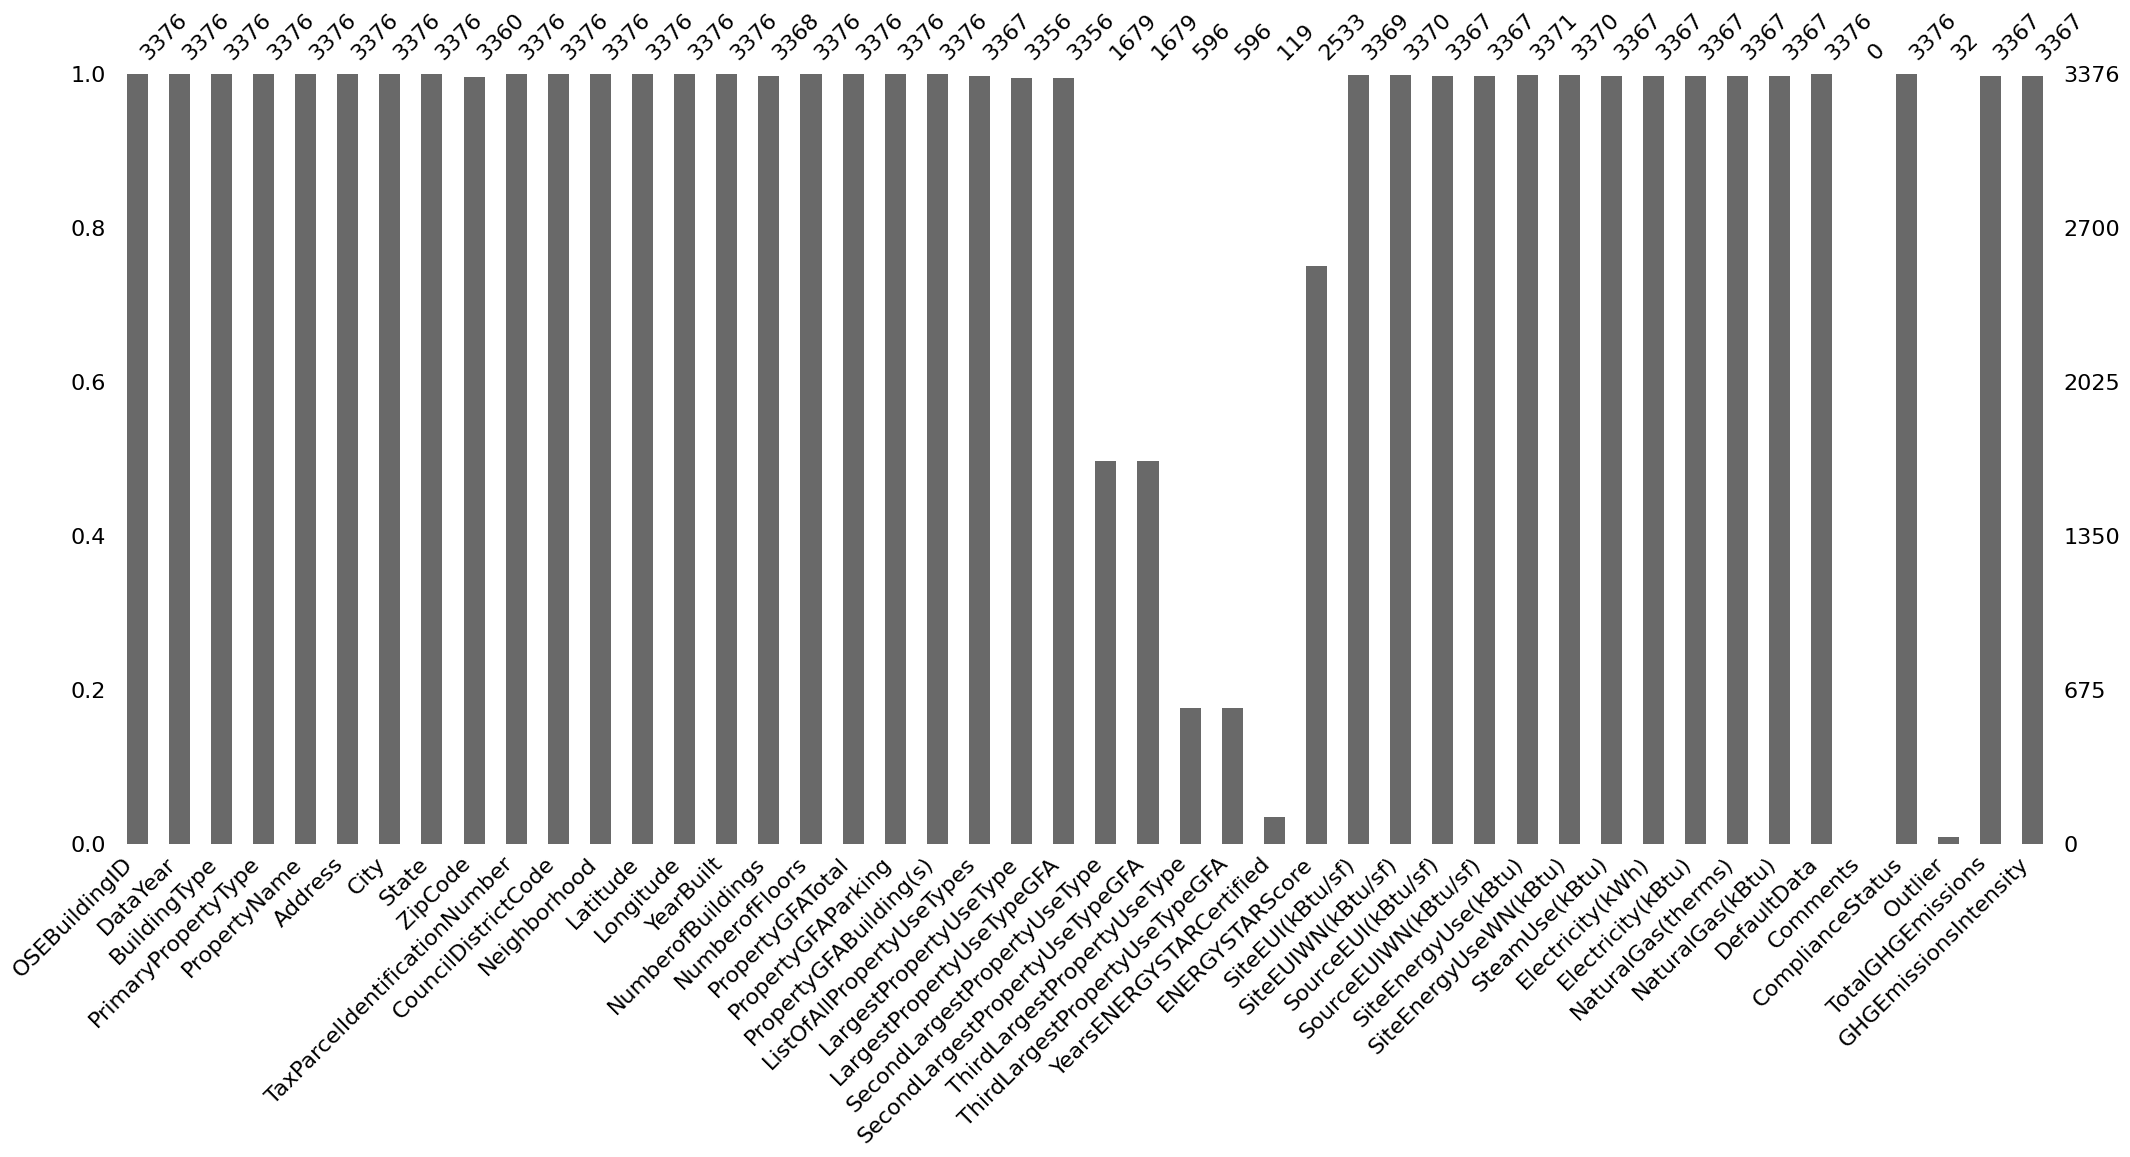

In [151]:
analyse_df(df_building_raw)

Il y a peu de valeurs manquantes sauf  : 
 - la colonne 'Comments' qui  est totalement vide.
 - La colonne 'Outlier' qui est presque vide (99% null - 32 non-null)  
 - Les colonnes sur les différents usages des batiments. Ceux sur les seconds et troisièmes usages peuvent s'expliquer par le fait que certain bâtiments ne doivent pas avoir plus d'un usage?
 - Les colonnes concernant la certification ENERGY STAR : YearsENERGYSTARCertified, ENERGYSTARScore  
Les informations sur les emissions (TotalGHGEmissions ) qui ont 9 valeurs nulles (sur 3376 bâtiments).

## 3. Calibrage pour notre problématique et sélection de variables pertinentes

### 3.1 Filtrage des bâtiments non résidentiels

L'énoncé évoque: vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de **bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées. 
Il convient de sélectionner dans un premier temps les seules bâtiments non destinés à l'habitation.

In [152]:
df_building_raw['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

Pour ne concerver que les bâtiments non résidentiels, j'écarte donc les bâtiments résidentiels (Multifamily LR (1-4) ,Multifamily HR (10+),Multifamily MR (5-9) )  
Les autres catégories sont des bâtiments non-résidentiels ('NonResidential' ,'Nonresidential COS', 'Nonresidential WA' ) et scolaires - aussi classés en non-résidentels ('SPS-District K-12', 'Campus' )

In [153]:
excluded_types = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']
df_building_clean = df_building_raw[~df_building_raw['BuildingType'].isin(excluded_types)]

In [154]:
print ("Suite à ce premier filtrage, la taille du jeu de données est de", df_building_clean.shape[0], "lignes et", df_building_clean.shape[1], "colonnes.")

Suite à ce premier filtrage, la taille du jeu de données est de 1668 lignes et 46 colonnes.


### 3.2 Caractéristiques non utiles

#### 3.2.1 Caractéristiques communes  - ville, année, état

In [155]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude                 

In [156]:

df_building_clean[['DataYear', 'City', 'State']].value_counts()

DataYear  City     State
2016      Seattle  WA       1668
Name: count, dtype: int64

Tous les données concernent des bâtiments de seattle, en 2016. Cela corresponds à notre périmètre d'étude. Il n'est donc pas utile de concerver ces colonnes.

In [157]:
df_building_clean = df_building_clean.drop(['DataYear', 'City', 'State'], axis=1)

#### 3.2.2 Colonnes aux valeurs manquantes - comments, outliers

Les données avec beaucoup de données manquantes sont écartés : 
 - la colonne 'Comments' qui  est totalement vide.
 - La colonne 'Outlier' qui est presque vide (99% null - 32 non-null)  
 - Les colonnes sur les usages secondaires et tersiaires

In [176]:
df_building_clean = df_building_clean.drop(['Comments', 'Outlier', 'SecondLargestPropertyUseType','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore' ], axis=1)


KeyError: "['Comments', 'Outlier', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore'] not found in axis"

In [ ]:
df_building_clean.shape

(1668, 35)

#### 3.2.3 Données techniques et statut


DefaultData : indique si certaines valeurs ont été remplacées par des valeurs par défaut.

ComplianceStatus : statut de conformité réglementaire du bâtiment (soumis, conforme, etc.).

In [179]:
df_building_clean = df_building_clean.drop(['DefaultData','ComplianceStatus'], axis=1)

KeyError: "['DefaultData', 'ComplianceStatus'] not found in axis"

### 3.3 Tri pour les colonnes redondantes

#### 3.3.1 Localisation et identification du bâtiment

Les données sur l'adresse du batiment et du nom du batiment ne seront pas utilisés dans le cadre de l'étude (de donne pas des éléments permettants de caractériser les évolutions de consommations des bâtiments). Nous pouvons les écarter.  
Nous ne garderons que les latitudes et longitudes.

In [160]:
df_building_clean = df_building_clean.drop(['OSEBuildingID','PropertyName','Address','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode','Neighborhood'], axis=1)


#### 3.3.2 Usage du bâtiment

Certaines données sembles redondantes : il convient dans ce cas de choisir lesquels concerver.
Par exemple les types d'usages ('PrimaryPropertyType', 'LargestPropertyUseType', ' ListOfAllPropertyUseTypes')

In [161]:
print(df_building_clean[['PrimaryPropertyType', 'LargestPropertyUseType','ListOfAllPropertyUseTypes']].value_counts())

PrimaryPropertyType          LargestPropertyUseType                                ListOfAllPropertyUseTypes                                                                                                                                                                     
K-12 School                  K-12 School                                           K-12 School                                                                                                                                                                                       135
Small- and Mid-Sized Office  Office                                                Office                                                                                                                                                                                            114
Warehouse                    Non-Refrigerated Warehouse                            Non-Refrigerated Warehouse                                                       

On voit que ces 3 variables sont assez détaillées concernant le type d'usage des bâtiments, 'LargestPropertyUseType' et 'ListOfAllPropertyUseTypes', donnant des indications plus précises, mais sans doute trop nombreuses. Nous ferons le choix de conserver 'PrimaryPropertyType', 

In [162]:
df_building_clean = df_building_clean.drop(['LargestPropertyUseType','ListOfAllPropertyUseTypes'], axis=1)


#### 3.3.3 Les données de surfaces

Plusieurs éléments sur la surface sont indiquées : PropertyGFATotal : surface des batiments + parking  
  PropertyGFAParking : surface des parkings     
 PropertyGFABuilding(s) : surface des bâtiments 
 LargestPropertyUseTypeGFA : surface du bâtiment principale (usage principal)
 Au regard de notre étude, nous ne concerverons que la surface des bâtiments

In [163]:
df_building_clean = df_building_clean.drop(['PropertyGFAParking','PropertyGFATotal', 'LargestPropertyUseTypeGFA'], axis=1)

#### 3.3.4 Les données sur la consommation en électricité

On supprimer toutes les valeurs en kBtu, s normalisées pour la météo (WN), pour que toutes tes variables énergétiques soient sur la même échelle et comparables, ce qui simplifie la modélisation et évite les confusions d’unités.
On garde les versions normalisées pour la météo (WN) parce qu’elles corrigent l’effet des variations climatiques.
*kBtu = kilo British thermal unit → unité d’énergie.
On l’utilise pour comparer toutes les énergies (électricité, gaz, vapeur) sur la même échelle, plutôt que mélanger kWh et therms.*

In [164]:
df_building_clean = df_building_clean.drop([
    'SiteEUI(kBtu/sf)', 
    'SourceEUI(kBtu/sf)',
    'SiteEnergyUse(kBtu)',
    'Electricity(kWh)',
    'NaturalGas(therms)'
], axis=1)

On transforme les consommations par type d’énergie en pourcentage du total pour représenter le mix énergétique sans révéler la consommation totale.

In [165]:
df_building_clean['pct_electricity'] = df_building_clean['Electricity(kBtu)'] / df_building_clean['SiteEnergyUseWN(kBtu)']
df_building_clean['pct_gas'] = df_building_clean['NaturalGas(kBtu)'] / df_building_clean['SiteEnergyUseWN(kBtu)']
df_building_clean['pct_steam'] = df_building_clean['SteamUse(kBtu)'] / df_building_clean['SiteEnergyUseWN(kBtu)']

In [166]:
df_building_clean = df_building_clean.drop(['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'], axis=1)

#### 3.3.5 Les indicateurs de performance énergétique

Au regard de objectif actuel : prédire les émissions totales et la consommation totale d’énergie
je garde les totaux,
je supprime les ratios par surface (SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), GHGEmissionsIntensity).

In [ ]:
df_building_clean = df_building_clean.drop([
    'SiteEUIWN(kBtu/sf)',
    'GHGEmissionsIntensity',
    'SourceEUIWN(kBtu/sf)'
], axis=1)

In [173]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            1668 non-null   object 
 1   PrimaryPropertyType     1668 non-null   object 
 2   Latitude                1668 non-null   float64
 3   Longitude               1668 non-null   float64
 4   YearBuilt               1668 non-null   int64  
 5   NumberofBuildings       1666 non-null   float64
 6   NumberofFloors          1668 non-null   int64  
 7   PropertyGFABuilding(s)  1668 non-null   int64  
 8   SiteEnergyUseWN(kBtu)   1665 non-null   float64
 9   TotalGHGEmissions       1666 non-null   float64
 10  pct_electricity         1656 non-null   float64
 11  pct_gas                 1647 non-null   float64
 12  pct_steam               1643 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 182.4+ KB


## 4 - Conclusion de l'analyse 

**Conclusion du cleaning :**

 Ces caractéristiques se répartissent en plusieurs attributs des bâtiments :  

- Les types de bâtiments : filtre : on concerve que les bâtiments non résidentiel

- La localisation (adresse, logitude - latitude) : on ne garde que longitude - latitude  

- Années de constructions  : on concerve : on transforme en "age des bâtiments"?

- Nombre de bâtiments et d'étages : on a concervé pour l'instant 

- Surface (PropertyGFATotal (surface parking+ batiments), PropertyGFABuilding(s) (Surface des bâtiments)) : on ne converve que la surface des bâtiments

- Type d'usage et consommation par type d'usage : on ne concerve que le primary type d'usage 

- Performances énergériques : ENERGYSTARScore, Énergie consommée / surface...   : suppression des calculs de perfomances énergétique

- Consommation énergétiques, en différentes unités : kBtu, kWh, kBtu, therms, kBtu : on a garder que les kBtu

- Émissions de GES : TotalGHGEmissions, GHGEmissionsIntensity   : on supprime le ratio et on ne garde que le totaux

Variables 'autres' : Comments, DefaultData, ComplianceStatus, Outlier.. : écarté pour l'instant ? 